In [1]:
%matplotlib inline

import pandas

import metrics
import plot
import market
from simulate import simulate_withdrawals
import withdrawal
import harvesting

from decimal import Decimal

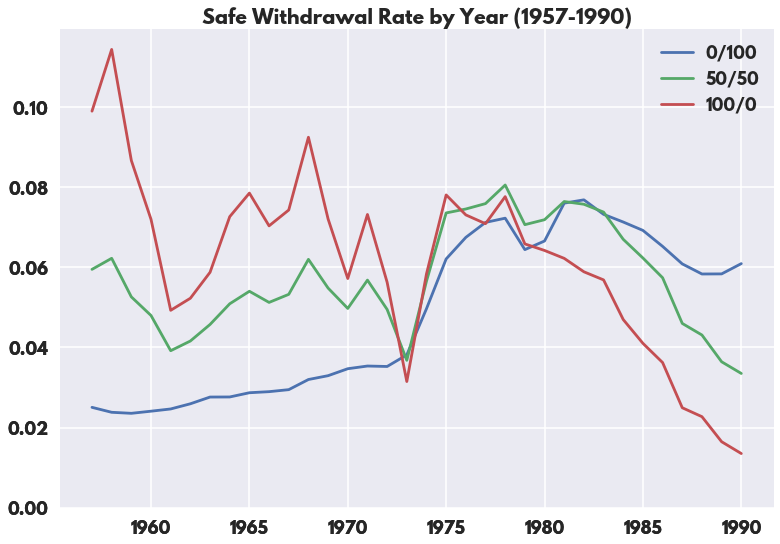

In [6]:
m = market.Japan_1957()
years = 30
start_year = 1957
last_year = 2020-years

def run(stock_pct):
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 1):
        returns = []
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.ssr(returns))
        swrs.loc[start_year+_] = swr
    return swrs

plot.plot_n({
    '0/100' : run(Decimal(0)),
#    '20/80' : run(Decimal(.2)),
#    '40/60' : run(Decimal(.4)),
    '50/50' : run(Decimal(.5)),
#    '60/40' : run(Decimal(.6)),
#    '80/20' : run(Decimal(.8)),
    '100/0' : run(Decimal(1)),    
}, '', 'Safe Withdrawal Rate by Year (%s-%s)' % (start_year, last_year), add_commas=False)


In [3]:
run(Decimal(.6)).loc[1990]*100

2.8769999896282825

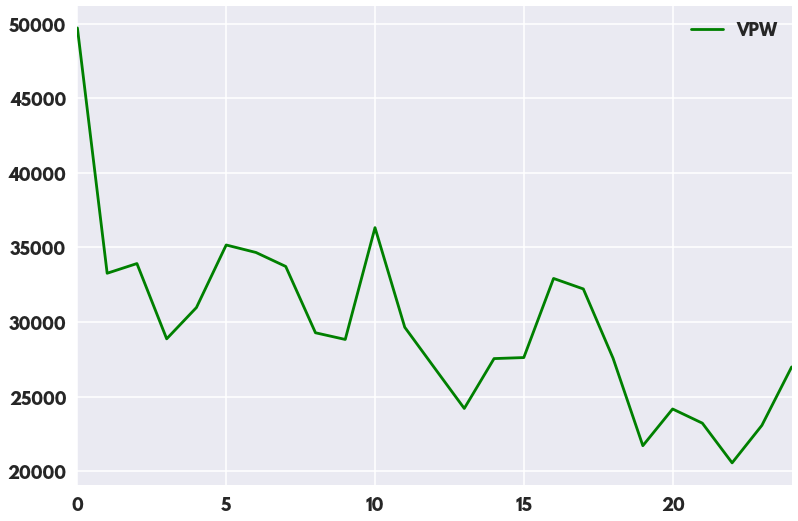

In [4]:
length = 25
year = 1990
vpw = simulate_withdrawals(m.iter_from(year), withdraw=withdrawal.VPW, harvesting=harvesting.make_rebalancer(.5), years=length)
ecm = simulate_withdrawals(m.iter_from(year), withdraw=withdrawal.ECM, harvesting=harvesting.PrimeHarvesting, years=length)
plot.seaborn.tsplot([float(n.withdraw_r) for n in vpw], color='green', legend=True, condition='VPW')
#plot.seaborn.tsplot([float(n.withdraw_r) for n in ecm], color='red', legend=True, condition='ECM')